# Data acquisition for spatiotemporal analysis: major considerations

    
    
<div style='text-align: right;'> <b>Insang Song <br> University of Oregon</b> </div>

## Contents
- Spatial turn, with a time flow
- Preliminaries: classification of spatiotemporal processes
- What should we collect and how would they be collected?
- Areal data: in the U.S.
- Illustration: census tracts


## Who am I?
__Insang Song__
- Ph.D. Candidate in Geography, University of Oregon
- Research interests: Spatiotemporal analysis, Causal inference, Mental health, Spatial data science
- Uses R daily and Python weekly

## Spatial turn with a time shift
- Spatial turn: interests in recognizing spatial dimensions of phenomena (mainly) in academic fields
> "Notions of place and space, much debated by geographers, have been as central a concern for intellectual historians and historians of science as for philosophers and others, but they have been differently expressed." -- Withers (2009:638)
- Temporal dimension also matters
    - Daily mobility patterns
    - Individual experience and environmental exposure
    - Dynamics in natural phenomena

## Spatiotemporal analysis: a primer on data issues

## What type of data?
- Vector geometries
    - Point: presence of special species, air pollution monitoring, river gauges
    - Line: human daily trajectories, wildlife trajectories
    - Polygon: __<font color='sky blue'>Census geographies</font>__, ZIP codes, any local area units
- Raster images
    - Multi-temporal images: vegetation, water, air pollution, geomagnetic properties, ...
    - Aerial photos/satellite imagery (i.e. panchromatic): surveillance, short-term environmental changes (e.g., wildfire, flood, ...)
<center><font color='orange'><b>Check the temporal availability of your data!</b></font></center>    


## Get into the data
### Ways of collection
- Directly download from providers' webpages (point-and-click)
- Using application programming interface (API) of providers (e.g., Census Bureau, NHGIS, etc.)

### Data from multiple time points
- It is important to look into the border changes and the changes in the details of measuring subjects
    - Code and description changes (e.g., race/ethnicity questions in decennial censuses) - may need to recode
    - Consolidation, annexation, and separation of areas (county, ZIP code areas, census tracts, ...) - may need to merge

## Problem definition and possible solutions
1. Spatial and temporal resolution mismatch
    - Matching resolutions by geostatistical or machine learning algorithms
    - Uncertainty should be assessed and reported

    
2. Changing geographies through time
    - Unifying boundaries that are maximally available through the all time
    - __Using crosswalk files__
    - Using advanced statistical measures such as areal interpolation

## Types of area changes (case of census tracts)
- Source: datadrivendetroit.org

![split](https://datadrivendetroit.org/wp-content/uploads/2021/09/2_D3_Census-Tract-Blog_Map_01-Split.png)

## Types of area changes (case of census tracts, cont'd)
- Source: datadrivendetroit.org

![combined](https://datadrivendetroit.org/wp-content/uploads/2021/09/3_D3_Census-Tract-Blog_Map_02-Combined.png)

## Types of area changes (case of census tracts)
- Source: datadrivendetroit.org

![new](https://datadrivendetroit.org/wp-content/uploads/2021/09/4_D3_Census-Tract-Blog_Map-New.png)

## Crosswalk
- __Crosswalk__: table(s) of the relationship or matching records between geographic areas in different years
    - Including 1:1, 1:N, N:1, and part:part matching records
    - Having the number of rows exceeding both (from-to) years' number of rows
- General information on crosswalk with a focus in census data: [Link](https://www.nhgis.org/geographic-crosswalks)
- For data from the Census Bureau, crosswalk files are available for 2000, 2010, and 2020 censuses

### Crosswalk sources
- [HUD ZIP crosswalk](https://www.huduser.gov/portal/datasets/usps_crosswalk.html)
- [U.S. Census Bureau's Relationship files](https://www.census.gov/geographies/reference-files/time-series/geo/relationship-files.html)
- [2020 Census Block Crosswalk data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T9VMJO)


## Hands-on example
### Background
- Census tracts in Portland, OR
- 2000 and 2010 Census
    - 2010 Census tract boundary is also effective for ACS in 2010-2019
    - 2000 boundary is effective for ACS in 2005-2009

### Objective
- To consolidate the 5-year ACS data from 2009 (2005-2009) and 2010 (2006-2010)

## American Community Survey data integration
- Strategy: population weighted mean
    - Using the 2000 population, we will take a weighted mean of the population for 2010 census tracts
* Steps
    * Take `POPPCT00` (percent of population in 2000 to be matched with the target geographic unit) and `POP00` (2000 total population in the origin geographic unit)
    * Compute the segment population weight
    $$w_{ij} = \frac{f_{ij} p_{ij}}{\sum_{j}{(f_{ij} p_{ij})}}$$
        * where $f_{ij}$ is the matched percentage of population in 2000 in the jth segment in 2000 in the ith census tract in 2010
        * $p_{ij}$ is the total population of the 2000 origin census tracts (<u>NOT the segment population!</u>)
    * Compute the weighted mean using the population weights by 2010 census tracts
    $$\mu_{i} = \sum_{j} w_{ij} p_{ij}$$

## Graphical example
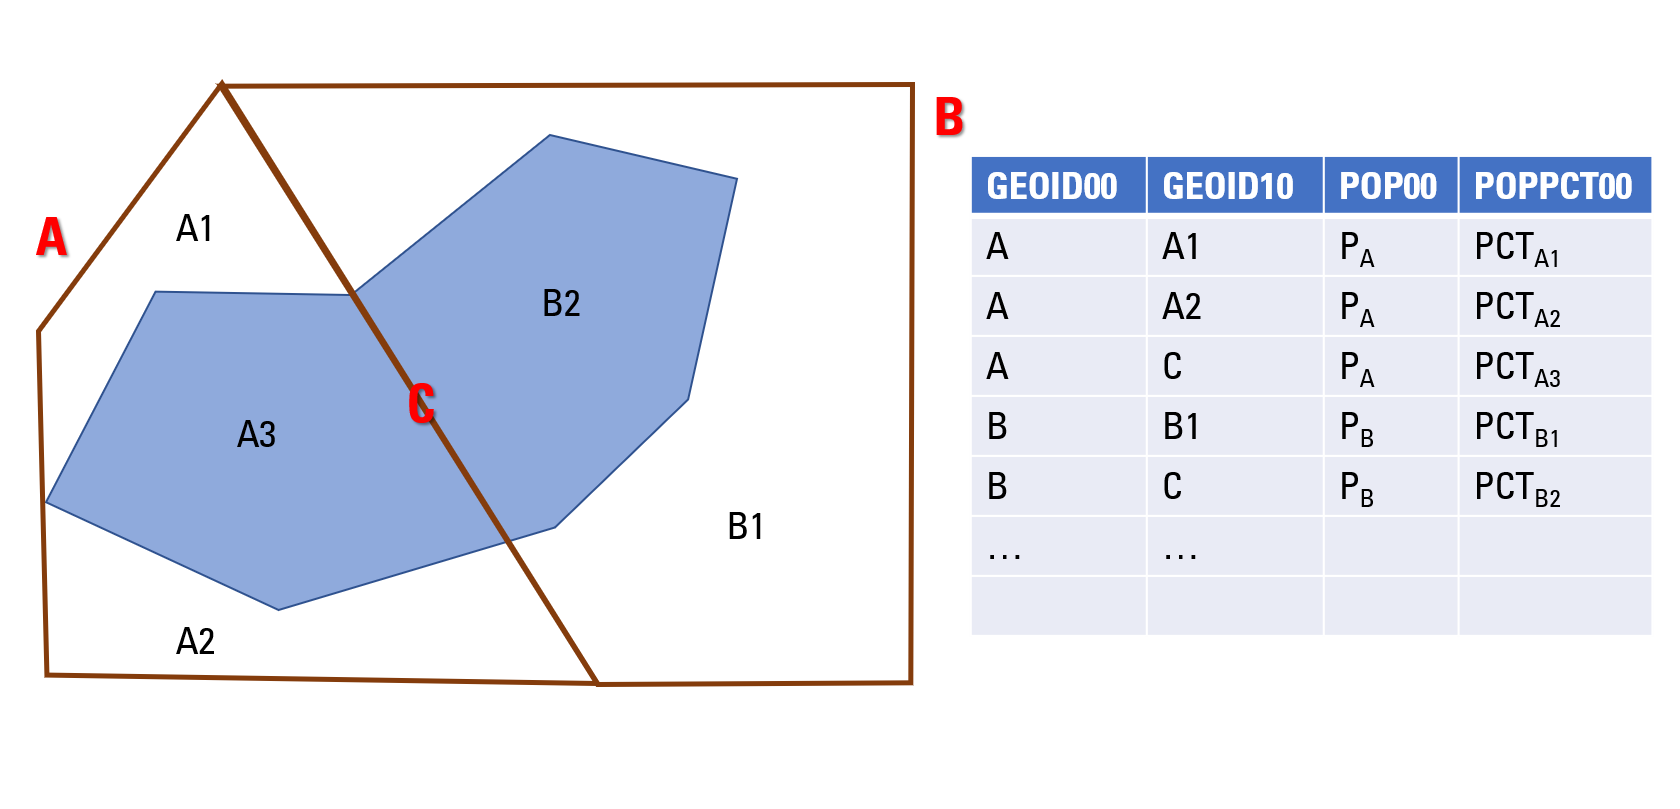

In [44]:
# crosswalk file directly from Census Bureau
cw_or = read.csv("https://www2.census.gov/geo/docs/maps-data/data/rel/trf_txt/or41trf.txt", header = FALSE)
colnames(cw_or) = c("STATE00", "COUNTY00", "TRACT00", "GEOID00", "POP00", "HU00", "PART00", "AREA00", "AREALAND00",
                    "STATE10", "COUNTY10", "TRACT10", "GEOID10", "POP10", "HU10", "PART10", "AREA10", "AREALAND10",
                    "AREAPT", "AREALANDPT", "AREAPCT00PT", "AREALANDPCT00PT", "AREAPCT10PT", "AREALANDPCT10PT", 
                    "POP10PT", "POPPCT00", "POPPCT10", "HU10PT", "HUPCT00", "HUPCT10")
head(cw_or)

,STATE00,COUNTY00,TRACT00,GEOID00,POP00,HU00,PART00,AREA00,AREALAND00,STATE10,⋯,AREAPCT00PT,AREALANDPCT00PT,AREAPCT10PT,AREALANDPCT10PT,POP10PT,POPPCT00,POPPCT10,HU10PT,HUPCT00,HUPCT10
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,16,75,980300,16075980300,7969,3061,P,193421610,190662899,41,⋯,0.65,0.54,0.73,0.61,0,0,0,0,0,0
2,41,1,950100,41001950100,2761,1936,P,2886826315,2872337282,41,⋯,100.00,100.00,100.00,100.00,2761,100,100,1936,100,100
3,41,1,950100,41001950100,2761,1936,P,2886826315,2872337282,41,⋯,0.00,0.00,0.00,0.00,0,0,0,0,0,0
4,41,1,950200,41001950200,3145,1524,W,20004678,20004678,41,⋯,100.00,100.00,100.00,100.00,3145,100,100,1524,100,100
5,41,1,950300,41001950300,2648,1353,W,1755855349,1750622770,41,⋯,100.00,100.00,100.00,100.00,2648,100,100,1353,100,100
6,41,1,950400,41001950400,3026,1468,W,5561747,5382767,41,⋯,100.00,100.00,100.00,100.00,3026,100,100,1468,100,100


In [59]:
options(warn = -1)
# Multnomah County FIPS: 41051
# packages to retrieve ACS and TIGER/Line files
if (!require(tigris)) { install.packages('tigris') }
if (!require(tidycensus)) { install.packages('tidycensus') }
# For plots
if (!require(ggplot2)) { install.packages('ggplot2') }
if (!require(sf)) { install.packages('sf') }
if (!require(rnaturalearth)) { install.packages('rnaturalearth') }
# Data munging
if (!require(dplyr)) { install.packages('dplyr') }
if (!require(tidyr)) { install.packages('tidyr') }

# API key (can be obtained at http://api.census.gov/data/key_signup.html)
capi <- '05db0646f9956eba295b88d5a86bf4fe455459f3'
census_api_key(capi)

# River boundary
# ne_download(scale = 110, )

Loading required package: rnaturalearth

To install your API key for use in future sessions, run this function with `install = TRUE`.



In [46]:
# Tract boundary
pdx_tract10 = tigris::tracts(state = 41, county = "051", year = 2010, refresh = T)
pdx_tract00 = tigris::tracts(state = 41, county = "051", year = 2000, refresh = T)
# Population data by age group
pop_codes = paste("B01001_", sprintf("%03d", 1:49), sep = "")
pdx_pop10 = tidycensus::get_acs(geography = "tract", variables = pop_codes, year = 2010, state = 41, county = "051") %>%
    dplyr::select(-NAME, -moe) %>%
    pivot_wider(values_from = estimate, names_from = variable)
pdx_pop09 = tidycensus::get_acs(geography = "tract", variables = pop_codes, year = 2009, state = 41, county = "051") %>%
    dplyr::select(-NAME, -moe) %>%
    pivot_wider(values_from = estimate, names_from = variable)

head(pdx_pop10, 3)
head(pdx_pop09, 3)

Getting data from the 2006-2010 5-year ACS

Getting data from the 2005-2009 5-year ACS



GEOID,B01001_001,B01001_002,B01001_003,B01001_004,B01001_005,B01001_006,B01001_007,B01001_008,B01001_009,⋯,B01001_040,B01001_041,B01001_042,B01001_043,B01001_044,B01001_045,B01001_046,B01001_047,B01001_048,B01001_049
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41051000100,6043,2920,175,307,126,87,10,0,22,⋯,125,287,101,133,41,45,98,38,20,146
41051000200,6052,2965,194,181,31,110,141,0,29,⋯,222,112,57,121,50,61,78,46,86,89
41051000301,4818,2482,91,48,120,0,281,114,92,⋯,139,60,21,11,47,37,41,105,36,118


GEOID,B01001_001,B01001_002,B01001_003,B01001_004,B01001_005,B01001_006,B01001_007,B01001_008,B01001_009,⋯,B01001_040,B01001_041,B01001_042,B01001_043,B01001_044,B01001_045,B01001_046,B01001_047,B01001_048,B01001_049
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41051000100,5923,2851,167,298,89,90,16,0,19,⋯,182,273,74,160,48,34,105,66,0,84
41051000200,6071,2904,227,188,36,34,152,45,53,⋯,236,242,23,83,59,42,109,50,75,90
41051000301,4280,2142,94,25,88,0,170,89,67,⋯,170,73,22,12,64,11,24,123,23,119


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


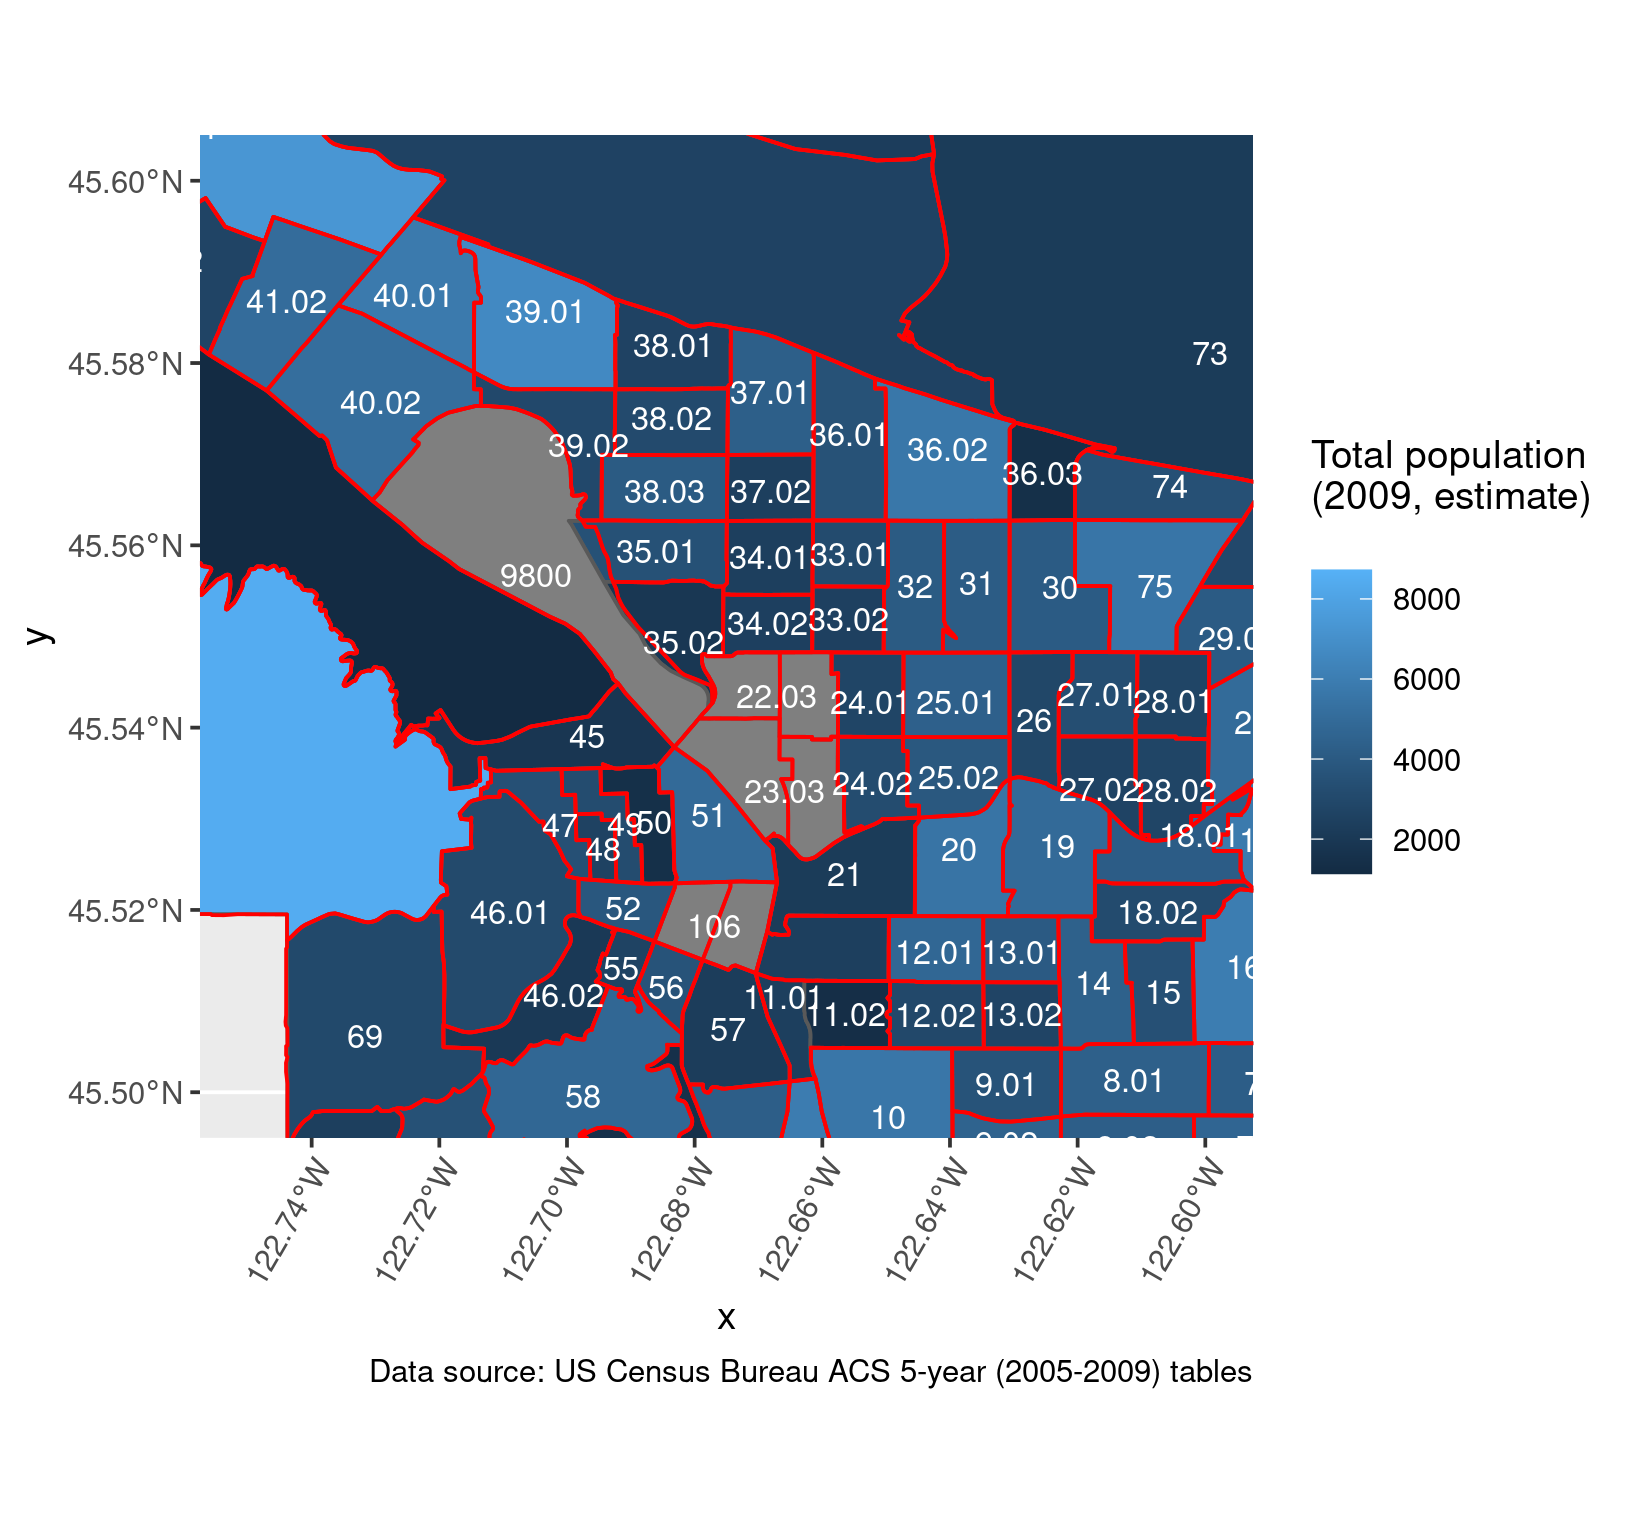

In [55]:
options(repr.plot.width = 6.4, repr.plot.height = 6, repr.plot.res = 254)
# Join
pdx_tract10p = pdx_tract10 %>%
    left_join(pdx_pop10, by = c("GEOID10" = "GEOID"))
pdx_tract00p = pdx_tract00 %>%
    left_join(pdx_pop09, by = c("CTIDFP00" = "GEOID"))

# If we don't use crosswalk...
pdx_tract1009p = pdx_tract10 %>%
    left_join(pdx_pop09, by = c("GEOID10" = "GEOID"))
ggplot() +
    geom_sf(data = pdx_tract1009p,
       mapping = aes(fill = B01001_001)) + 
    labs(fill = "Total population\n(2009, estimate)",
         caption = "Data source: US Census Bureau ACS 5-year (2005-2009) tables") + 
    geom_sf(data = pdx_tract00p, fill = 'transparent', color = 'red') +
    geom_sf_text(data = pdx_tract1009p, 
                 mapping = aes(label = NAME10),
                 cex = 3.25, color = 'white') +
    coord_sf(xlim = c(-122.75, -122.6), ylim = c(45.5, 45.6)) +
    theme(axis.text.x = element_text(hjust = 1, angle = 60))

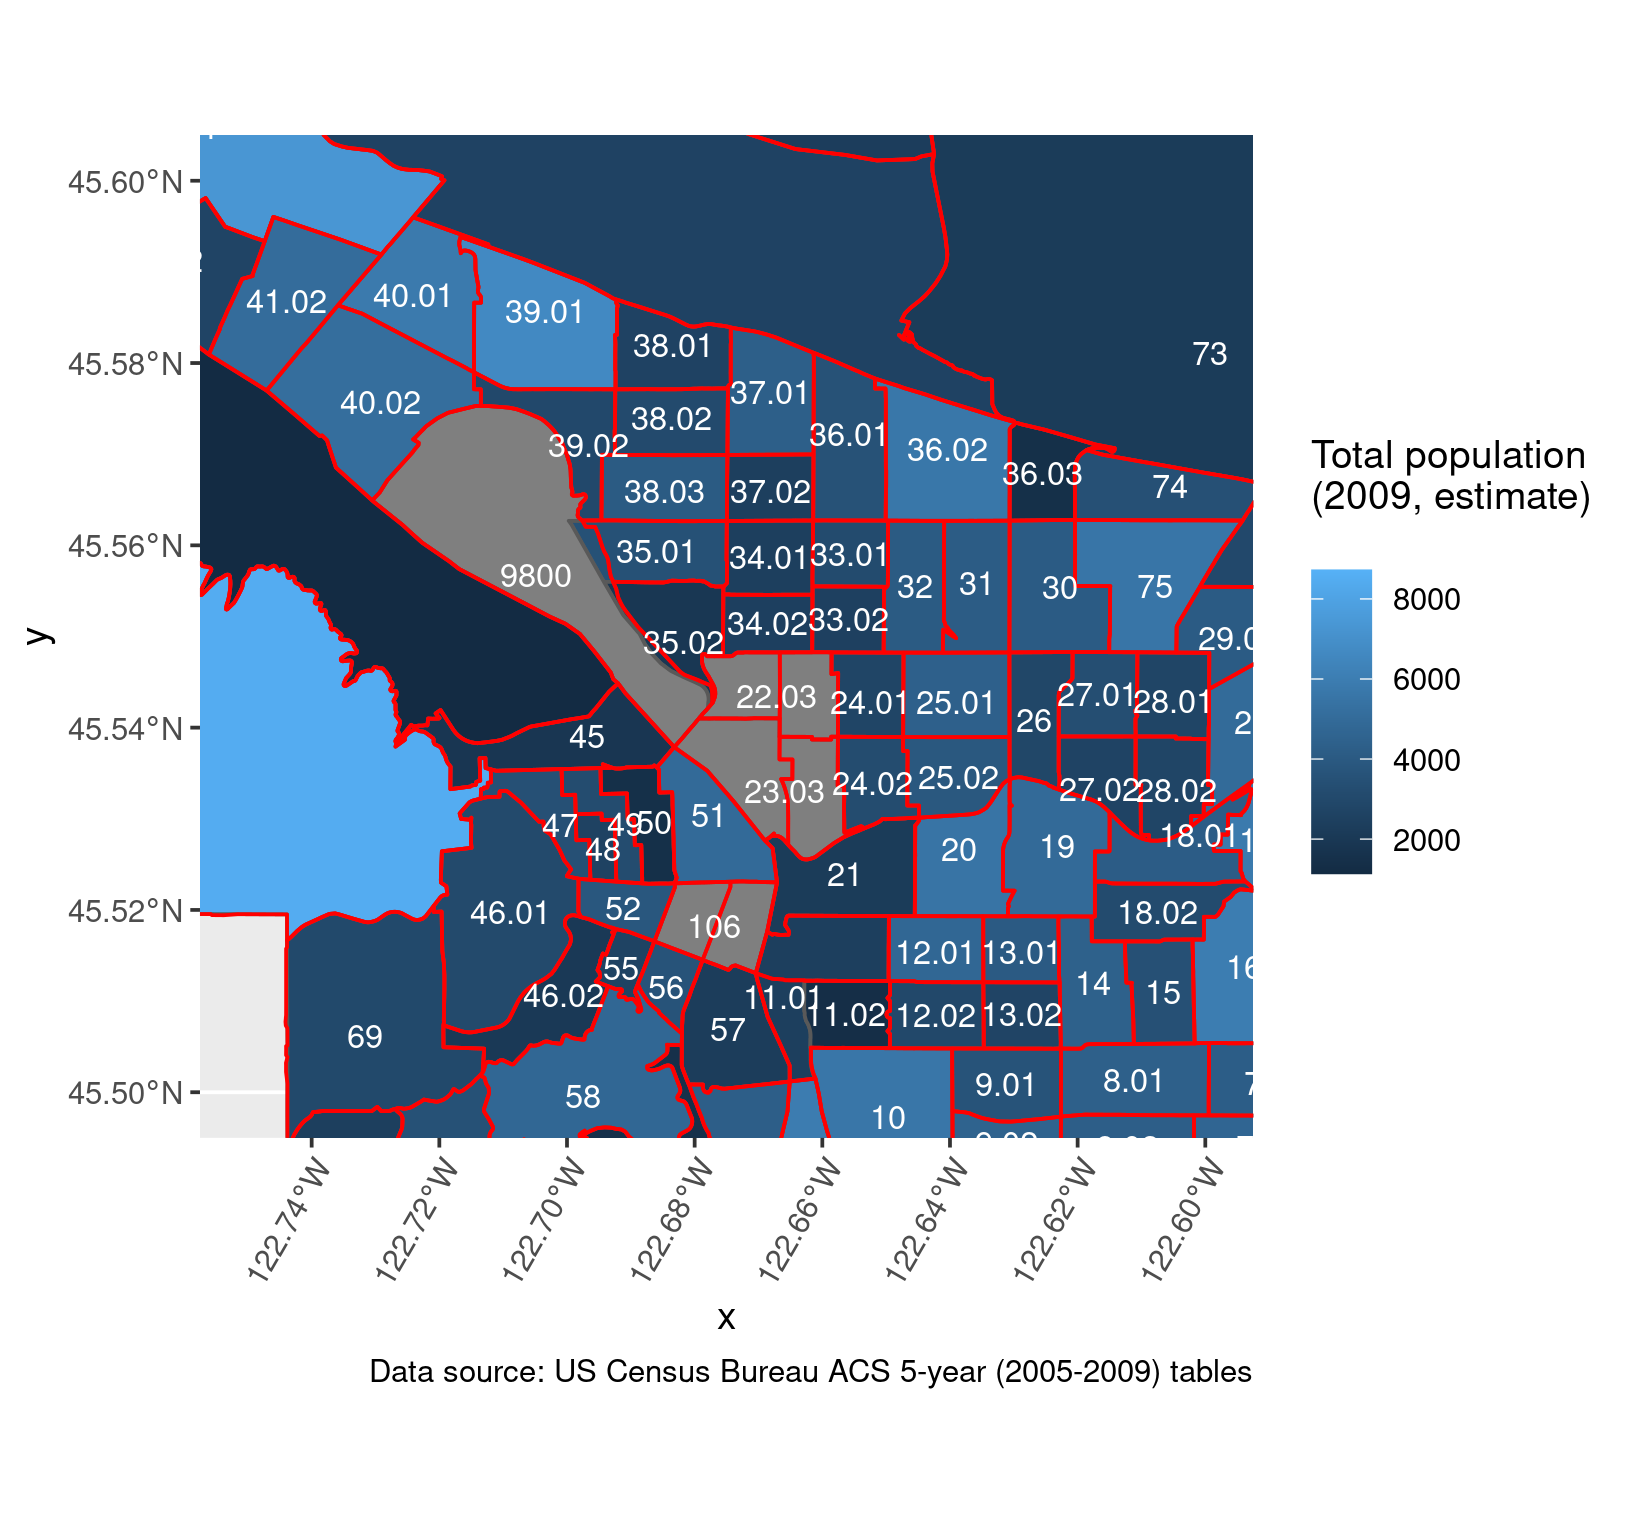

In [48]:
pdx_pop09_cw = 
  # input data is pdx_pop09, which is 2005-2009 population estimates
  pdx_pop09 %>%
  # we do full join because there may be duplicate tracts in the crosswalk table
  full_join(cw_or %>% mutate(GEOID00 = as.character(GEOID00)), 
            by = c('GEOID' = 'GEOID00')) %>%
  # just a data cleaning for the join in the next step
  mutate(GEOID10 = as.character(GEOID10)) %>%
  # group_by function is a grouping function for
  # (internally) aggregating records with the same
  # value of GEOID10 value.
  # Please note that we use GEOID10, NOT GEOID00!
  group_by(GEOID10) %>%
  # summarize_at function summarizes multiple columns
  # specified in .vars argument.
  summarize_at(.vars = vars(B01001_001:B01001_049),
               .funs = list(~floor(sum(. * ((POP00 * POPPCT00 / 100)/ sum(POP00 * POPPCT00 / 100)))))) %>%
  # We usually ungroup the grouped data frame because
  # the grouped one works in a unique way (i.e., grouping will be kept)
  ungroup

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


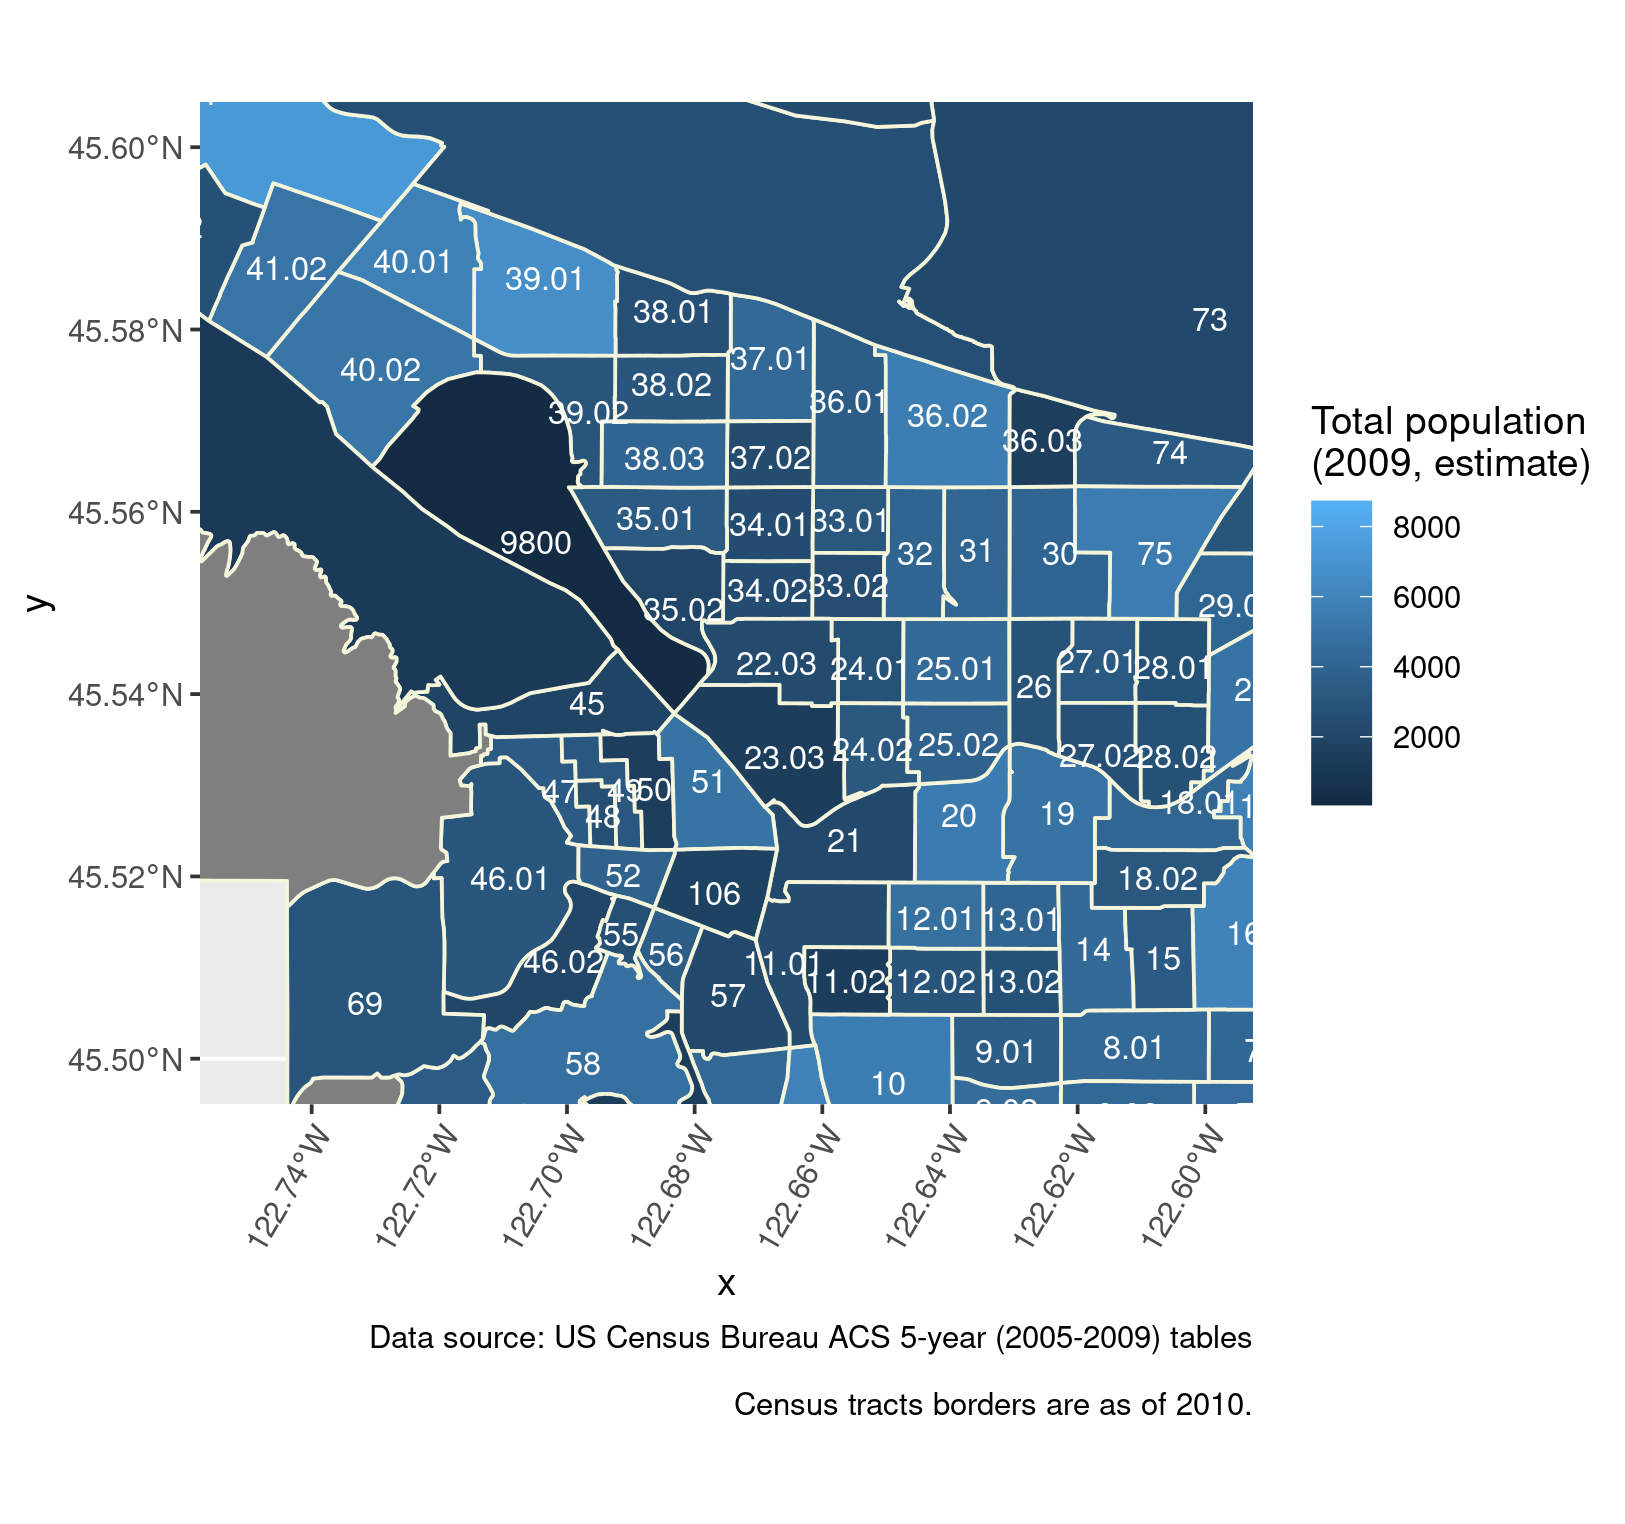

In [56]:
# After we use crosswalk...
pdx_tract1009pcw = pdx_tract10 %>%
    left_join(pdx_pop09_cw, by = c("GEOID10" = "GEOID10"))
ggplot() +
    geom_sf(data = pdx_tract1009pcw,
       mapping = aes(fill = B01001_001),
       color = 'beige') + 
    labs(fill = "Total population\n(2009, estimate)",
         caption = "Data source: US Census Bureau ACS 5-year (2005-2009) tables\n
                    Census tracts borders are as of 2010.") + 
    #geom_sf(data = pdx_tract00p, fill = 'transparent', color = 'red') +
    geom_sf_text(data = pdx_tract1009p, 
                 mapping = aes(label = NAME10),
                 cex = 3.25, color = 'white') +
    coord_sf(xlim = c(-122.75, -122.6), ylim = c(45.5, 45.6)) +
    theme(axis.text.x = element_text(hjust = 1, angle = 60))

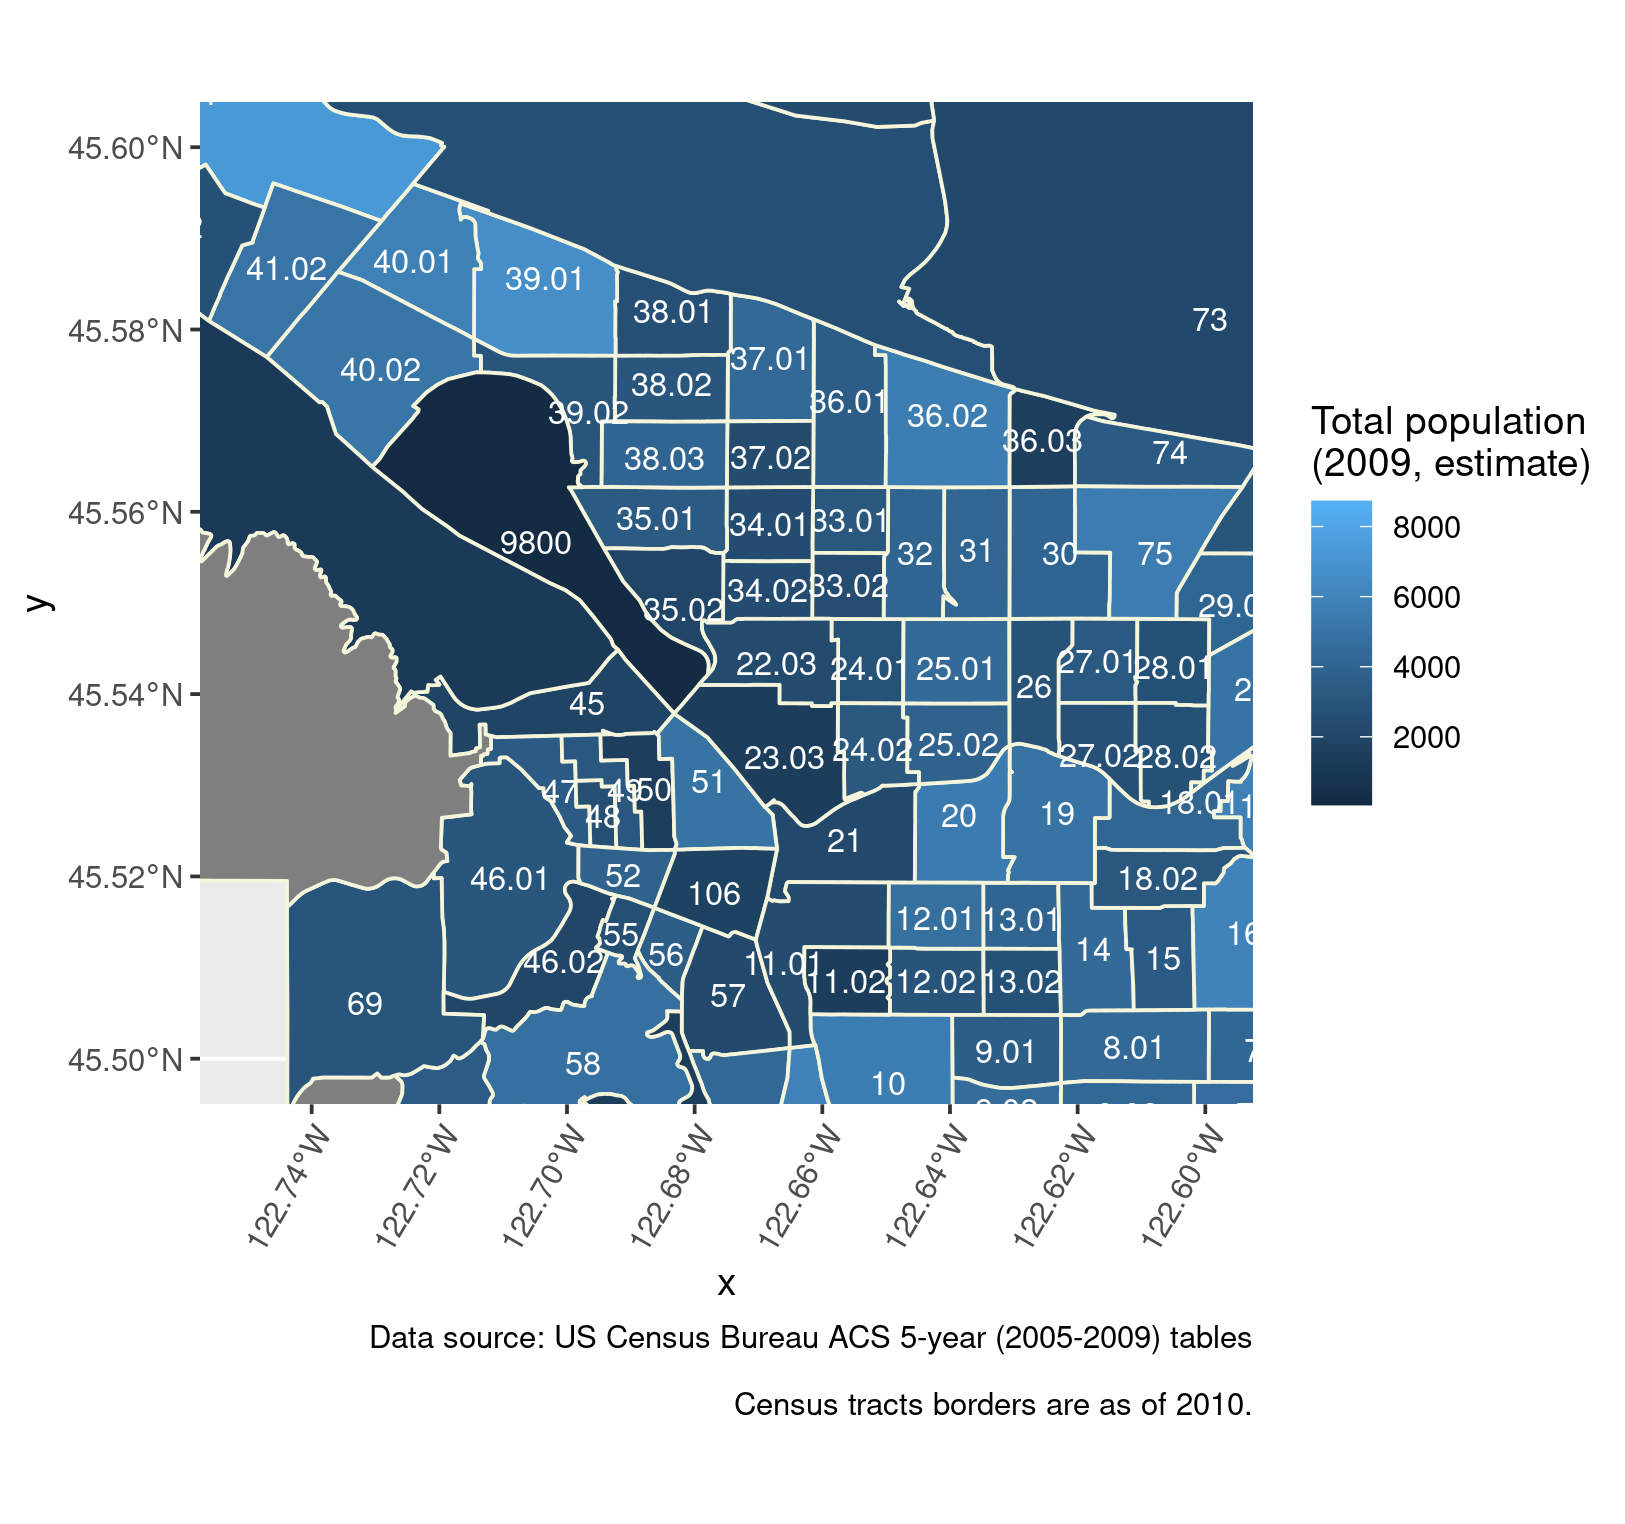

## 2009 and 2010 comparison
```{}
pdx_tract09pcw = pdx_tract1009pcw %>% mutate(year = 2009)
pdx_tract10pcw = pdx_tract10p %>% mutate(year = 2010) %>% dplyr::select(colnames(pdx_tract09pcw))
pdx_tract0910pcw = rbind(pdx_tract09pcw, pdx_tract10pcw) %>%
    st_drop_geometry %>%
    pivot_longer(cols = B01001_001:B01001_049)
head(pdx_tract0910pcw)


pdx_tract09pcw = pdx_tract1009pcw %>% mutate(year = 2009)
pdx_tract10pcw = pdx_tract10p %>% mutate(year = 2010) %>% dplyr::select(colnames(pdx_tract09pcw))
pdx_tract0910pcw = rbind(pdx_tract09pcw, pdx_tract10pcw) %>%
    st_drop_geometry %>%
    pivot_longer(cols = B01001_001:B01001_049) %>%
    filter(name == 'B01001_001')
ggplot(data = pdx_tract0910pcw,
       aes(x = year, y = value, group = GEOID10)) +
    geom_point() +
    geom_line(alpha = 0.7, lwd = 0.33)
```

In [50]:
pdx_tract09pcw = pdx_tract1009pcw %>% mutate(year = 2009)
pdx_tract10pcw = pdx_tract10p %>% mutate(year = 2010) %>% dplyr::select(colnames(pdx_tract09pcw))
pdx_tract0910pcw = rbind(pdx_tract09pcw, pdx_tract10pcw) %>%
    st_drop_geometry %>%
    pivot_longer(cols = B01001_001:B01001_049)
head(pdx_tract0910pcw)

STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,COUNTYFP,STATEFP,year,name,value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_001,2927
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_002,1329
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_003,86
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_004,13
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_005,102
41,051,001202,41051001202,12.02,Census Tract 12.02,G5020,S,934019,0,+45.5084564,-122.6421276,051,41,2009,B01001_006,27


Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 row(s) containing missing values (geom_path).”


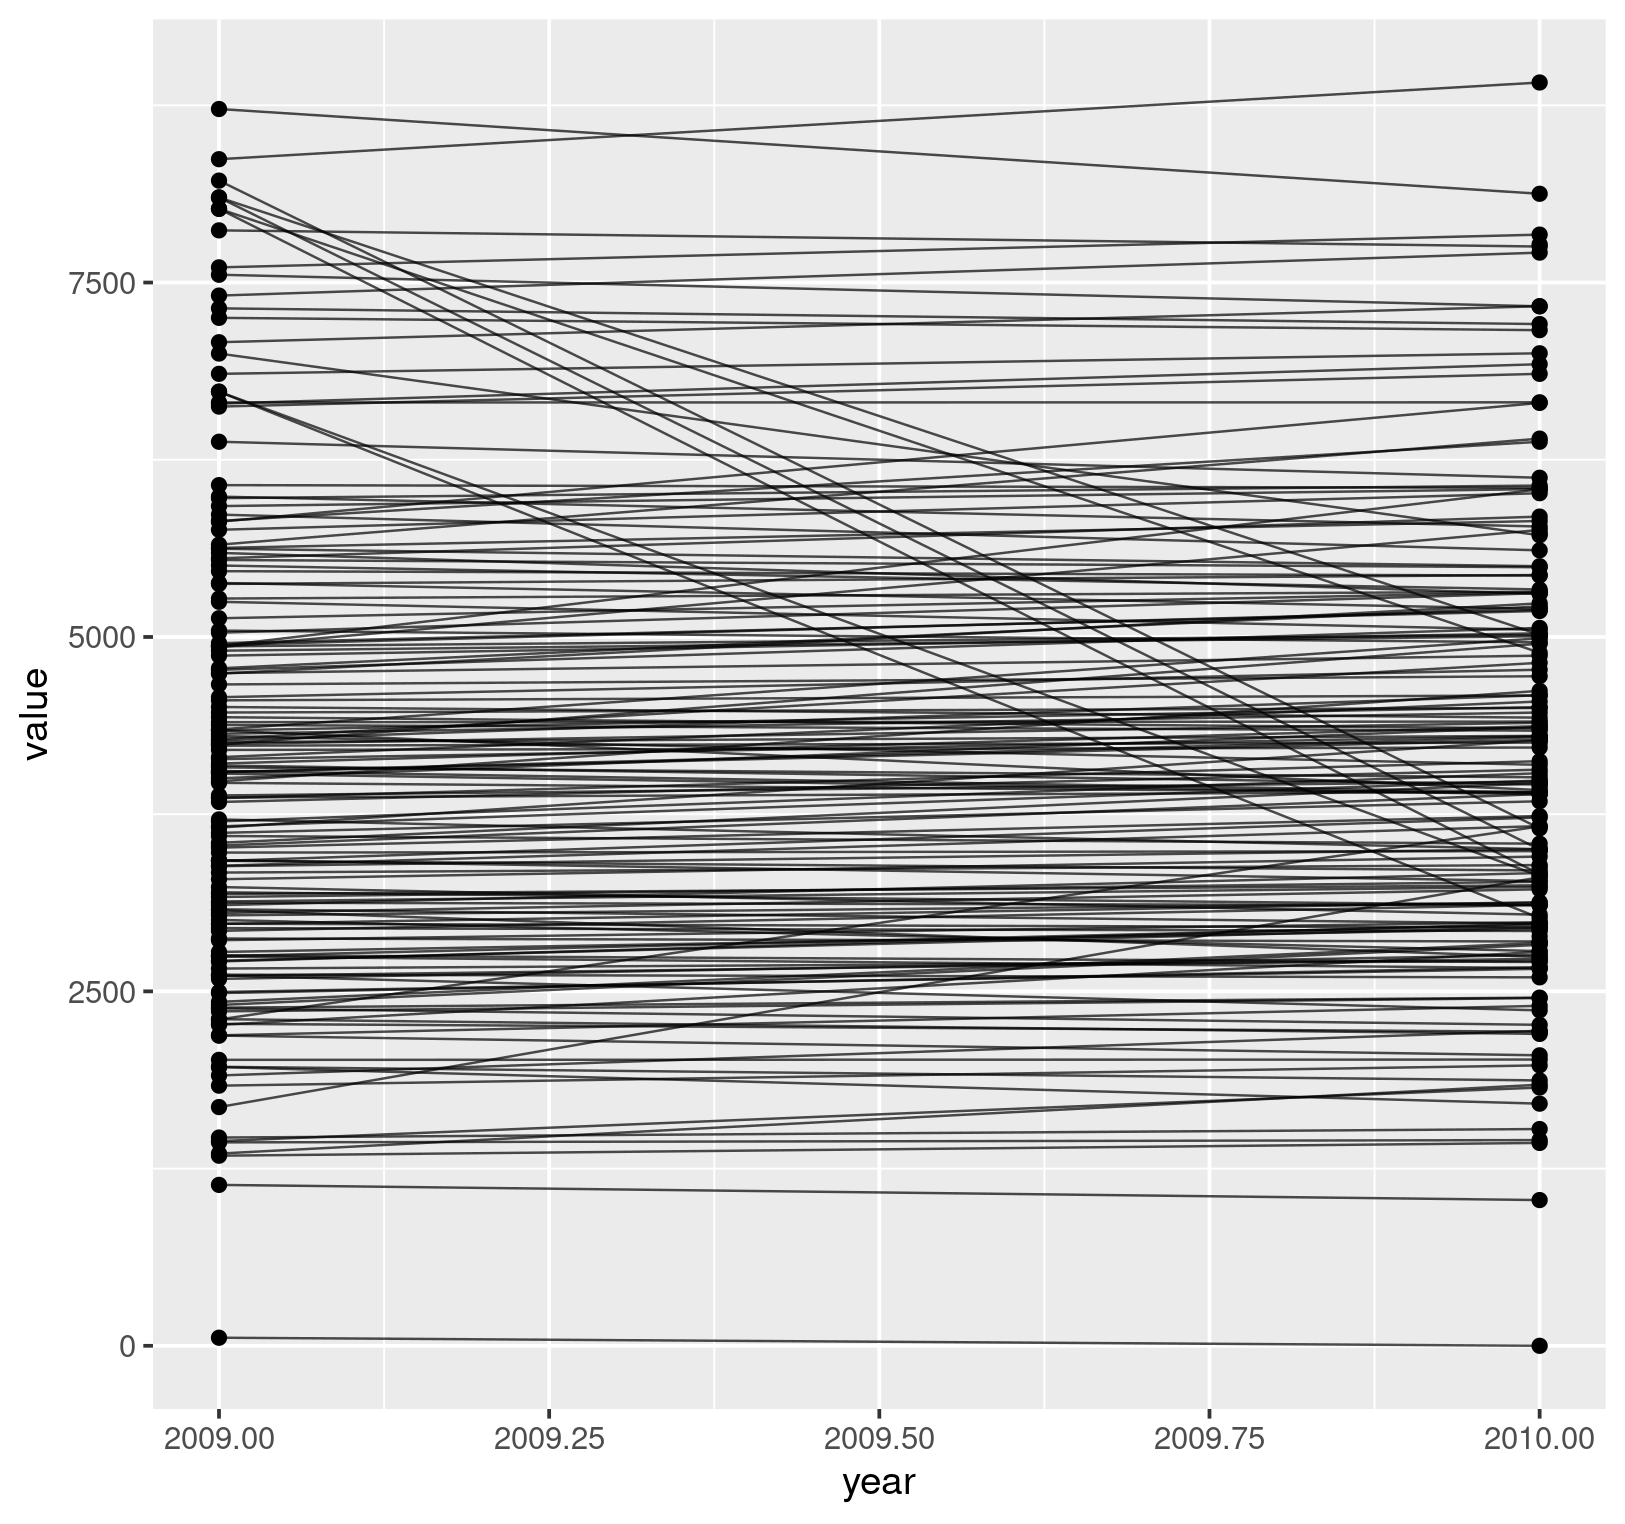

In [51]:
pdx_tract09pcw = pdx_tract1009pcw %>% mutate(year = 2009)
pdx_tract10pcw = pdx_tract10p %>% mutate(year = 2010) %>% dplyr::select(colnames(pdx_tract09pcw))
pdx_tract0910pcw = rbind(pdx_tract09pcw, pdx_tract10pcw) %>%
    st_drop_geometry %>%
    pivot_longer(cols = B01001_001:B01001_049) %>%
    filter(name == 'B01001_001')
ggplot(data = pdx_tract0910pcw,
       aes(x = year, y = value, group = GEOID10)) +
    geom_point() +
    geom_line(alpha = 0.7, lwd = 0.33)

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


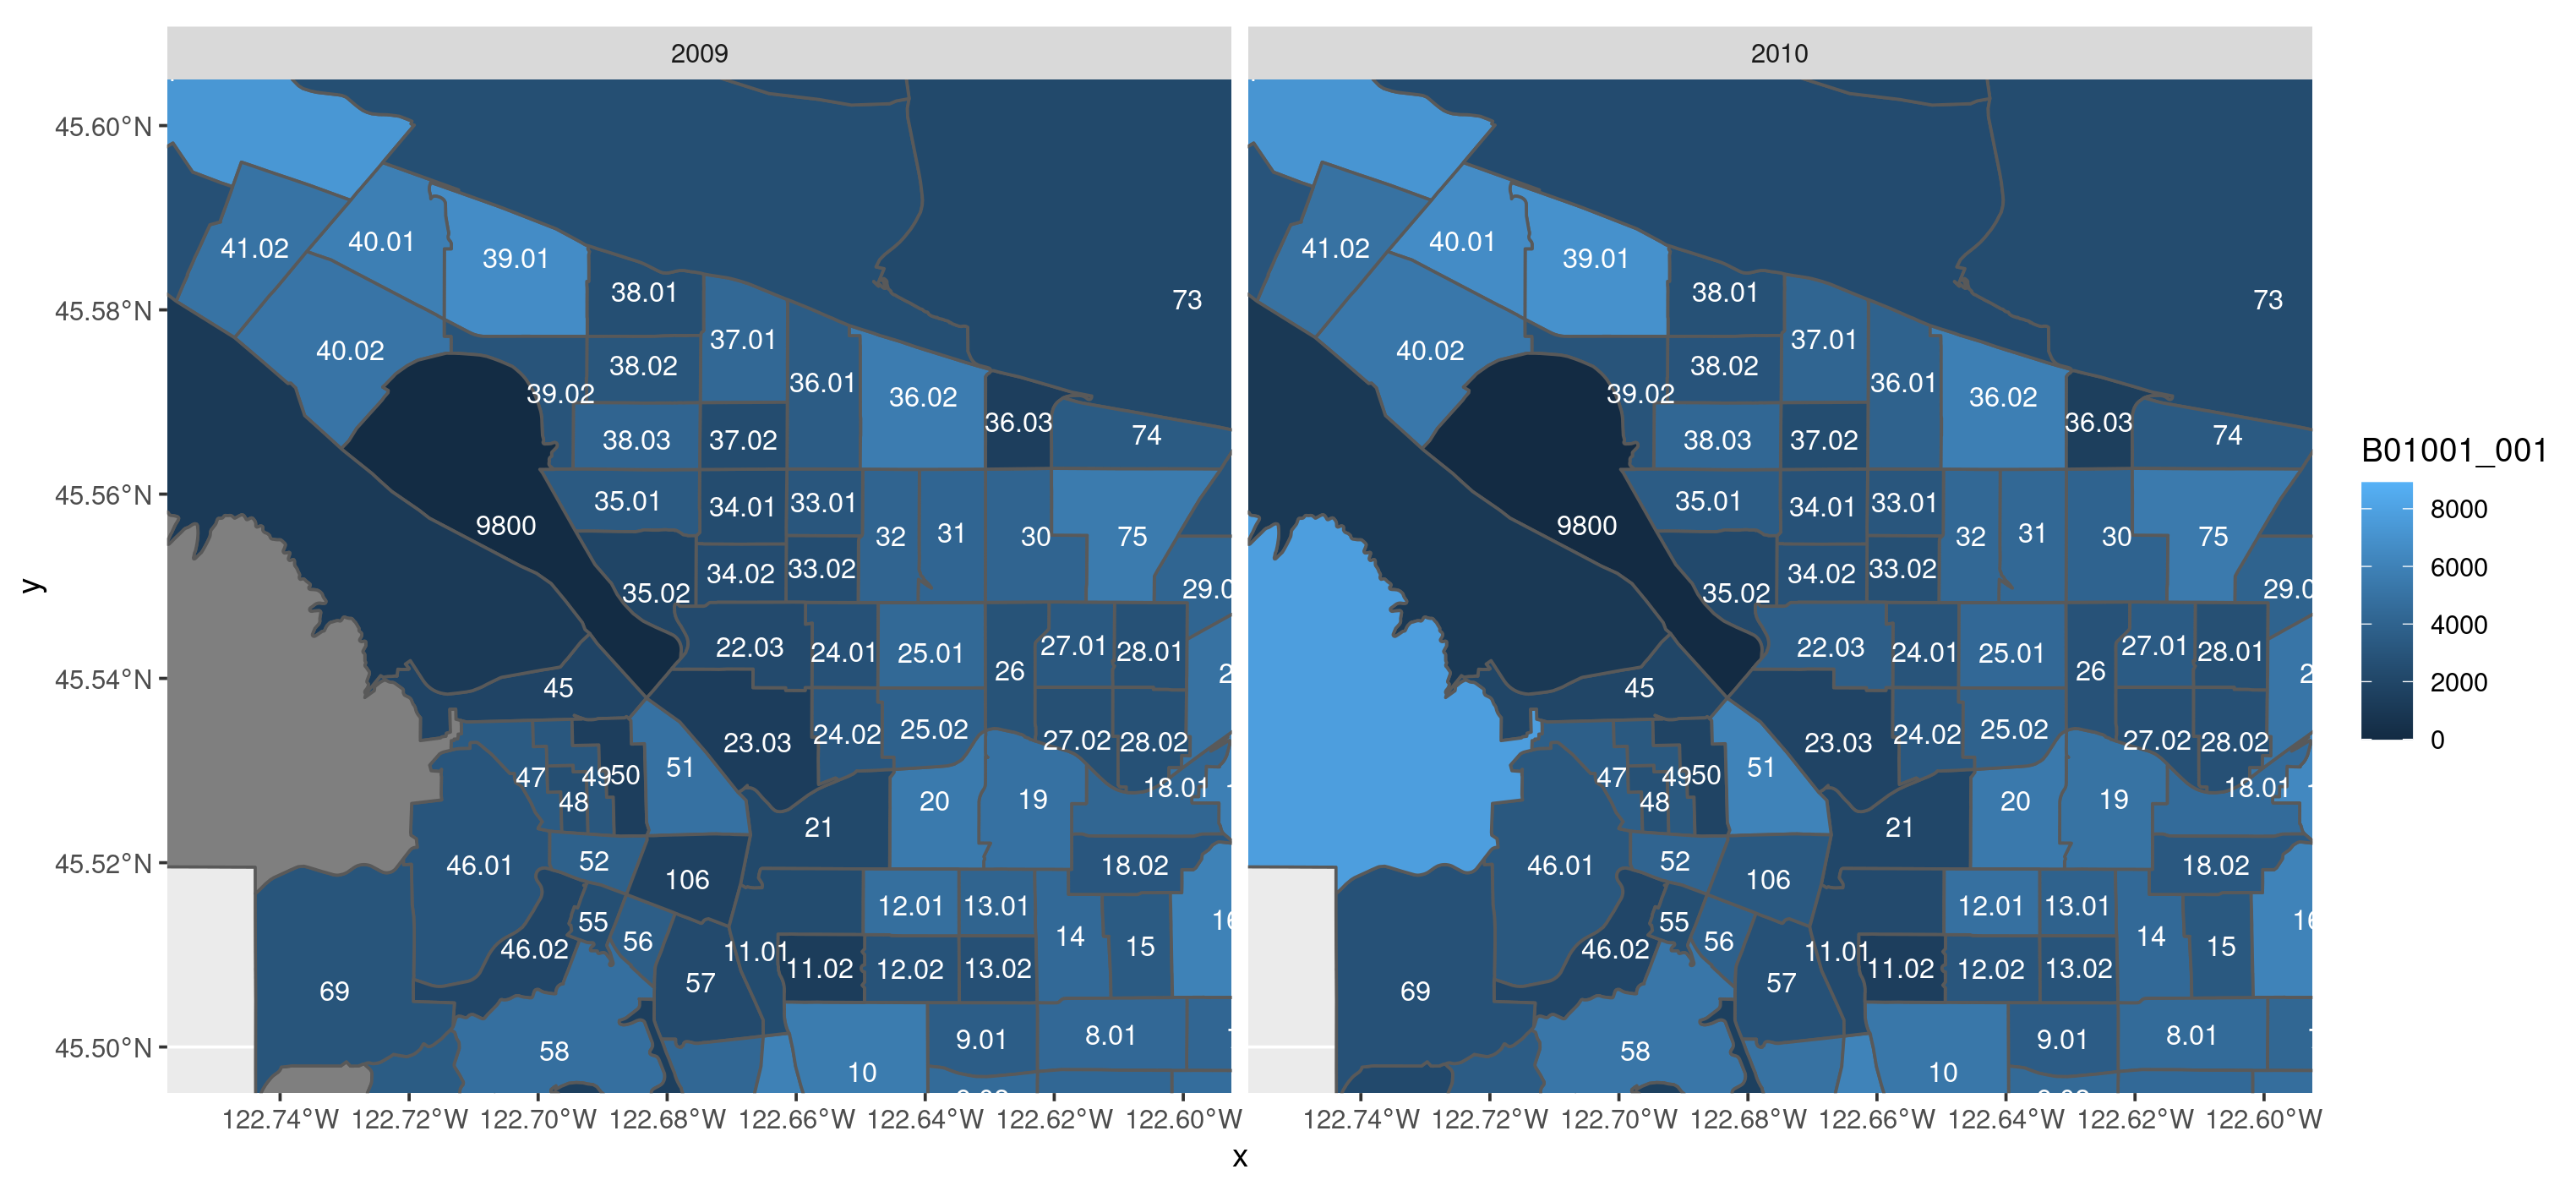

In [52]:
options(repr.plot.width = 12, repr.plot.height = 5.6, repr.plot.res = 254, warn = -1)
pdx_tract0910pcwsf = rbind(pdx_tract09pcw, pdx_tract10pcw)
suppressWarnings({
ggplot(data = pdx_tract0910pcwsf) +
    geom_sf(aes(fill = B01001_001)) +
    facet_wrap(~year) +
    geom_sf_text(mapping = aes(label = NAME10),
                 cex = 3.25, color = 'white') +
    coord_sf(xlim = c(-122.75, -122.6), ylim = c(45.5, 45.6))
})

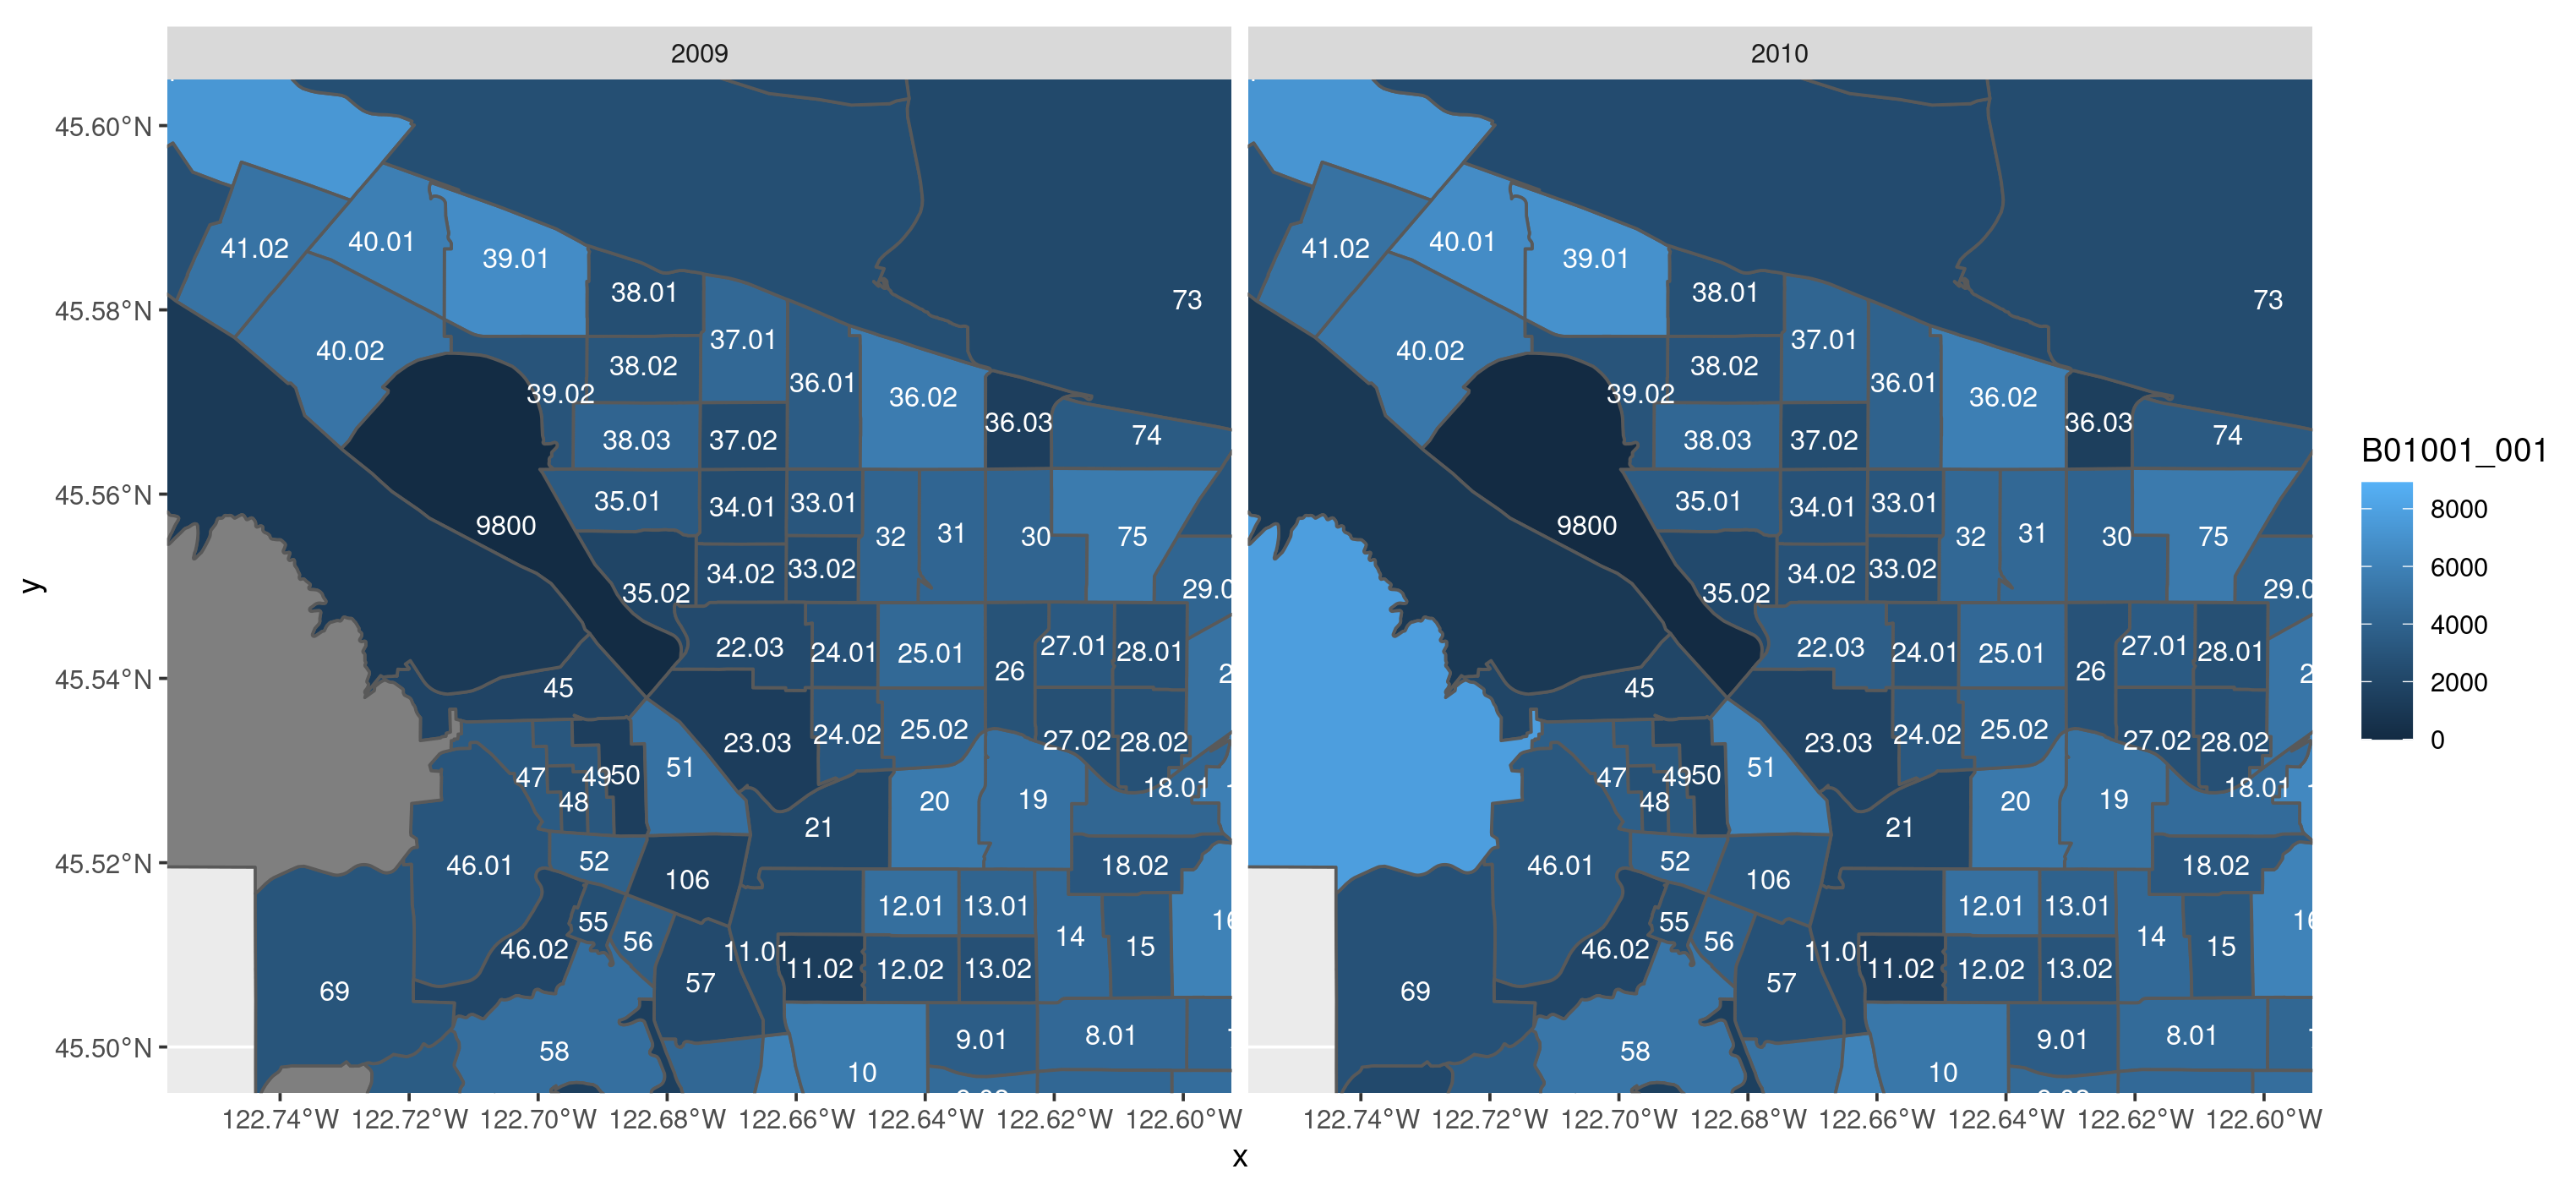

## Concluding remarks
- The intact spatiotemporal data are crucial to conduct the reliable spatiotemporal analysis
- Even government-sourced areal data are not free from the temporal changes.
- Spatiotemporal integration of the data should be done in light of your analysis goal, available reference data (e.g., crosswalk tables), and the data value stability

# Thank you
#### Feel free to contact me: isong@uoregon.edu
#### https://www.issong.net
#### This slide is available at https://github.com/sigmafelix/Gmisc/blob/master/URISA_Presentation_041322.ipynb

<center><font color='red'><b>Think what and how changes at a dimension(s) affect the outcome</b></font></center>    


In [58]:
## jupyter nbconvert URISA_Presentation_041322.ipynb --to slides --SlidesExporter.reveal_scroll=True
